In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn

In [5]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True
...,...,...,...,...,...
395,15691863,46,41000,1,False
396,15706071,51,23000,1,True
397,15654296,50,20000,1,False
398,15755018,36,33000,0,True


In [8]:
# Assuming you have your data loaded into a DataFrame called 'dataset'

# Splitting dataset into independent and dependent variables
indep = dataset[['Age', 'EstimatedSalary', 'Gender_Male']]
dep = dataset['Purchased']

In [9]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size=0.2, random_state=42)

In [14]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True, False]
}

In [15]:
# Creating a RandomForestClassifier instance
rf = RandomForestClassifier(random_state=42)

In [16]:
# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [17]:
# Perform hyperparameter tuning on the training set
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 100]},
             verbose=2)

In [18]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [19]:
# Predicting on the test set
y_pred = grid_search.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,accuracy_score
clf_report = classification_report(y_test, y_pred)
print('Classification Report is:',clf_report)

Classification Report is:               precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



In [20]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.925


Confusion Matrix is:
 [[48  4]
 [ 2 26]]


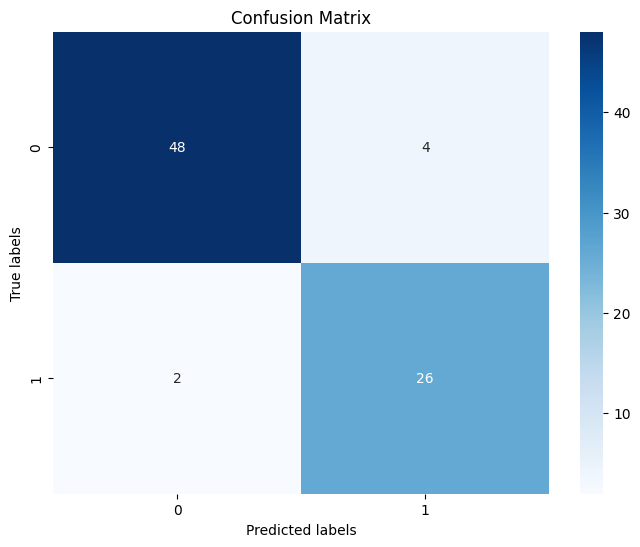

In [26]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is:\n',conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

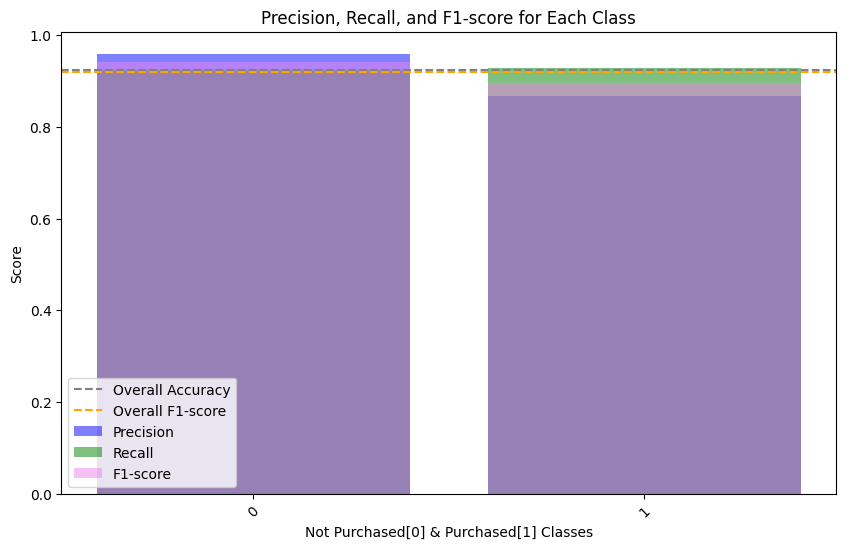

In [34]:
report = classification_report(y_test, y_pred, output_dict=True)

# Overall accuracy and F1-score
overall_accuracy = report['accuracy']
overall_f1_score = report['macro avg']['f1-score']

# Extract class-wise precision, recall, and F1-score
class_names = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
class_precision = [report[class_name]['precision'] for class_name in class_names]
class_recall = [report[class_name]['recall'] for class_name in class_names]
class_f1_score = [report[class_name]['f1-score'] for class_name in class_names]

# Plot graph for true class accuracy score and F1-score
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_precision, color='blue', alpha=0.5, label='Precision')
plt.bar(class_names, class_recall, color='green', alpha=0.5, label='Recall')
plt.bar(class_names, class_f1_score, color='Violet', alpha=0.5, label='F1-score')
plt.axhline(y=overall_accuracy, color='gray', linestyle='--', label='Overall Accuracy')
plt.axhline(y=overall_f1_score, color='orange', linestyle='--', label='Overall F1-score')
plt.xlabel('Not Purchased[0] & Purchased[1] Classes')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score for Each Class')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [36]:
import pickle
filename='finalized_model_ML_Grid_RF_Classification.sav'
pickle.dump(grid_search,open(filename,'wb'))

In [40]:
loaded_model=pickle.load(open('finalized_model_ML_Grid_RF_Classification.sav','rb'))
result=loaded_model.predict([[50,20000,False]])
#result=loaded_model.predict([[X_train]])
print(result)
warn.filterwarnings('ignore')

[1]
